In [1]:
import numpy as np
import numpy.linalg as la

In [2]:
datasets = ['CIFAR', 'MNIST']
net_names = ['ConvBig', 'ConvMed', 'FFNN']
perturbations = ['HazeThenRotation', 'ContrastVariationThenRotation', 'ContrastVariationThenHaze']
interval_sizes = np.array([10**(-0.25*k) for k in range(4, 20, 3)]) * 2

In [5]:
print(interval_sizes)

[2.00000000e-01 3.55655882e-02 6.32455532e-03 1.12468265e-03
 2.00000000e-04 3.55655882e-05]


In [3]:
import re

class Interval:
    def __init__(self, interval_str):
        m = re.match(r'\[(.*),(.*)\]', interval_str)
        self.lower, self.upper = float(m.group(1)), float(m.group(2))
    def get_abs_max(self):
        return max(abs(self.lower), abs(self.upper))

In [4]:
from statistics import median

NUM_IMAGES = 10

all_data = {}

for dataset in datasets:
    all_data[dataset] = {}
    for net in net_names:
        all_data[dataset][net] = {}
        for perturbation in perturbations:
            all_data[dataset][net][perturbation] = {}
            filename = f'results_compose/results_compose_nosplit/{net}_{dataset}_{perturbation}_nosplit.txt'
            with open(filename) as f:
                content = f.readlines()
            content = [x.strip() for x in content] 
            data = []
            
            for header, arr in zip(content[::2], content[1::2]):
                items = header.split(',')
                interval_size = float(items[4])
                time = float(items[7])
                
                # FOR LIPSCHITZ CONSTANT
                jacobians = np.array(list(map(lambda x: Interval(x).get_abs_max(), arr.split(';')[:-1]))).reshape(NUM_IMAGES, 20)
                
                avg_norm = 0
                for jacobi in jacobians:
                    jacobi = jacobi.reshape(2, 10).T
                    avg_norm += la.norm(jacobi, np.inf)
                avg_norm /= NUM_IMAGES
                
                add = 0
                for isize in interval_sizes:
                    if np.isclose(isize, interval_size):
                        add = 1
                        break
                        
                if add:
                    data.append((interval_size, time, avg_norm))
                    
            all_data[dataset][net][perturbation] = data            

In [5]:
NUM_IMAGES = 10

all_data_splitting2 = {}

for dataset in datasets:
    all_data_splitting2[dataset] = {}
    for net in net_names:
        all_data_splitting2[dataset][net] = {}
        for perturbation in perturbations:  
            all_data_splitting2[dataset][net][perturbation] = {}
            filename = f'results_compose/results_compose_split2/{net}_{dataset}_{perturbation}_split2.txt'
            with open(filename) as f:
                content = f.readlines()
            content = [x.strip() for x in content]
            data = []
            
            for header, arr in zip(content[::2], content[1::2]):
                items = header.split(',')
                interval_size = float(items[4])
                time = float(items[8])
                
                # FOR LIPSCHITZ CONSTANT
                jacobians = np.array(list(map(lambda x: Interval(x).get_abs_max(), arr.split(';')[:-1]))).reshape(NUM_IMAGES, 20*4)
                
                avg_norm = 0
                for jacobi in jacobians:
                    jacobi = jacobi.reshape(4 * 2, 10).T
                    
                    norm = 0
                    for col in range(0, 4 * 2, 2):
                        norm = max(norm, la.norm(jacobi[:, col:col+2], np.inf))
                    avg_norm += norm
                avg_norm /= NUM_IMAGES
                
                add = 0
                for isize in interval_sizes:
                    if np.isclose(isize, interval_size):
                        add = 1
                        break
                
                if add:
                    data.append((interval_size, time, avg_norm))
            
            all_data_splitting2[dataset][net][perturbation] = data  

In [6]:
NUM_IMAGES = 10

all_data_splitting3 = {}

for dataset in datasets:
    all_data_splitting3[dataset] = {}
    for net in net_names:
        all_data_splitting3[dataset][net] = {}
        for perturbation in perturbations:  
            all_data_splitting3[dataset][net][perturbation] = {}
            filename = f'results_compose/results_compose_split3/{net}_{dataset}_{perturbation}_split3.txt'
            with open(filename) as f:
                content = f.readlines()
            content = [x.strip() for x in content]
            data = []
            
            for header, arr in zip(content[::2], content[1::2]):
                items = header.split(',')
                interval_size = float(items[4])
                time = float(items[8])
                
                # FOR LIPSCHITZ CONSTANT
                jacobians = np.array(list(map(lambda x: Interval(x).get_abs_max(), arr.split(';')[:-1]))).reshape(NUM_IMAGES, 20*9)
                
                avg_norm = 0
                for jacobi in jacobians:
                    jacobi = jacobi.reshape(9 * 2, 10).T
                    
                    norm = 0
                    for col in range(0, 9 * 2, 2):
                        norm = max(norm, la.norm(jacobi[:, col:col+2], np.inf))
                    avg_norm += norm
                avg_norm /= NUM_IMAGES
                
                add = 0
                for isize in interval_sizes:
                    if np.isclose(isize, interval_size):
                        add = 1
                        break
                
                if add:
                    data.append((interval_size, time, avg_norm))
            
            all_data_splitting3[dataset][net][perturbation] = data  

In [11]:
NUM_IMAGES = 10

all_data_splitting5 = {}

for dataset in datasets:
    all_data_splitting5[dataset] = {}
    for net in net_names:
        all_data_splitting5[dataset][net] = {}
        for perturbation in perturbations:  
            all_data_splitting5[dataset][net][perturbation] = {}
            filename = f'results_compose/results_compose_split5/{net}_{dataset}_{perturbation}_split5.txt'
            with open(filename) as f:
                content = f.readlines()
            content = [x.strip() for x in content]
            data = []
            
            for header, arr in zip(content[::2], content[1::2]):
                items = header.split(',')
                interval_size = float(items[4])
                time = float(items[8])
                
                # FOR LIPSCHITZ CONSTANT
                jacobians = np.array(list(map(lambda x: Interval(x).get_abs_max(), arr.split(';')[:-1]))).reshape(NUM_IMAGES, 20*25)
                
                avg_norm = 0
                for jacobi in jacobians:
                    jacobi = jacobi.reshape(25 * 2, 10).T
                    
                    norm = 0
                    for col in range(0, 25 * 2, 2):
#                         if np.isclose(interval_size, 2e-4) and perturbation == 'ContrastVariationThenRotation' and dataset == 'MNIST':
#                             print(la.norm(jacobi[:, col:col+2], np.inf))
#                             print(jacobi[:, col:col+2])
                        norm = max(norm, la.norm(jacobi[:, col:col+2], np.inf))
#                     if np.isclose(interval_size, 2e-4) and perturbation == 'ContrastVariationThenRotation' and dataset == 'MNIST':
#                         print()
#                         print()
                    avg_norm += norm
                avg_norm /= NUM_IMAGES
                
                add = 0
                for isize in interval_sizes:
                    if np.isclose(isize, interval_size):
                        add = 1
                        break
                
                if add:
                    data.append((interval_size, time, avg_norm))
            
            all_data_splitting5[dataset][net][perturbation] = data  

253778.18
[[250481.     3297.18]
 [226724.     2968.25]
 [234266.     3076.94]
 [229498.     3017.62]
 [215289.     2839.17]
 [218320.     2857.93]
 [229037.     3048.79]
 [220367.     2908.43]
 [228948.     3011.36]
 [219871.     2909.  ]]
253571.46
[[250075.     3496.46]
 [226356.     3148.8 ]
 [233886.     3263.47]
 [229126.     3200.46]
 [214939.     3010.76]
 [217965.     3031.8 ]
 [228665.     3231.27]
 [220009.     3083.68]
 [228576.     3193.33]
 [219514.     3083.68]]
7614945.0
[[ 162845. 7452100.]
 [ 147697. 6760140.]
 [ 152273. 6970570.]
 [ 149645. 6849960.]
 [ 139981. 6408270.]
 [ 139750. 6395160.]
 [ 150390. 6883040.]
 [ 144411. 6610050.]
 [ 145778. 6673260.]
 [ 142289. 6513990.]]
252401.46
[[249366.     3035.46]
 [226051.     2732.77]
 [233952.     2806.57]
 [229134.     2770.35]
 [213610.     2568.41]
 [217204.     2628.25]
 [227654.     2788.85]
 [220096.     2716.24]
 [226636.     2728.23]
 [218297.     2617.75]]
252384.11
[[249366.     3018.11]
 [226051.     2717.04]


1075.5514
[[ 906.806     10.7643 ]
 [1051.47      14.4474 ]
 [ 908.805     13.5607 ]
 [1056.87      10.4525 ]
 [1040.55      13.6274 ]
 [1030.        10.9051 ]
 [1050.63      24.9214 ]
 [ 982.469      7.01601]
 [ 967.235     13.6192 ]
 [ 943.374     30.8978 ]]
1075.5615
[[ 906.811     10.7684 ]
 [1051.48      14.4427 ]
 [ 908.81      13.5632 ]
 [1056.87      10.4517 ]
 [1040.55      13.6244 ]
 [1030.        10.9033 ]
 [1050.64      24.9215 ]
 [ 982.473      7.01342]
 [ 967.24      13.6209 ]
 [ 943.378     30.8945 ]]
28942.55
[[  903.905 23620.   ]
 [ 1048.21  27762.9  ]
 [  905.931 24174.6  ]
 [ 1053.45  27889.1  ]
 [ 1036.83  27806.   ]
 [ 1026.8   27203.5  ]
 [ 1047.21  27768.5  ]
 [  979.694 25466.7  ]
 [  964.162 25514.5  ]
 [  940.179 25041.5  ]]
1084.4043
[[ 906.811     19.1409 ]
 [1051.47      32.9343 ]
 [ 908.809     12.3373 ]
 [1056.87      27.1655 ]
 [1040.55       9.26368]
 [1030.        18.5416 ]
 [1050.64      14.7024 ]
 [ 982.472     25.761  ]
 [ 967.239      8.65735]
 [ 

30480.951
[[26399.       125.275 ]
 [30359.9      121.051 ]
 [24212.        95.0361]
 [21811.5       88.544 ]
 [28959.5      115.012 ]
 [27344.6      110.999 ]
 [29047.3      119.313 ]
 [27461.3      113.218 ]
 [27887.8      109.863 ]
 [27483.2      111.525 ]]
30481.653
[[26399.6      125.279 ]
 [30360.6      121.053 ]
 [24212.6       95.0364]
 [21811.9       88.5447]
 [28960.2      115.013 ]
 [27345.2      111.001 ]
 [29047.9      119.315 ]
 [27461.9      113.219 ]
 [27888.4      109.863 ]
 [27483.8      111.527 ]]
485964.8
[[ 21606.8 371005. ]
 [ 26734.8 459230. ]
 [ 19778.9 339748. ]
 [ 18794.2 322868. ]
 [ 25767.9 442656. ]
 [ 23755.8 408112. ]
 [ 24567.3 421955. ]
 [ 22898.4 393394. ]
 [ 24354.5 418363. ]
 [ 24448.7 419970. ]]
30923.915
[[26740.8     155.209]
 [30753.      170.915]
 [24525.7     132.209]
 [22094.2     120.203]
 [29334.8     161.861]
 [27698.8     149.962]
 [29423.6     168.041]
 [27817.2     151.618]
 [28248.9     153.892]
 [27839.2     154.4  ]]
30923.20499999999

In [9]:
network_baselines = {'FFNN': {'CIFAR':(97618464.0, 14.711), 'MNIST':(165186992.0, 8.205)},
                    'ConvMed': {'CIFAR':(64603.76171875, 2.042), 'MNIST':(92872.0859375, 2.746)},
                    'ConvBig': {'CIFAR':(1587185536.0, 11.289), 'MNIST':(3638838016.0, 8.871)}}
normalize_constants = {'MNIST': 1/0.3081, 'CIFAR': 1/0.1994}

import pandas as pd
df = pd.read_csv('results_compose/results_compose_baseline/perturbation_baseline.csv', index_col=None)

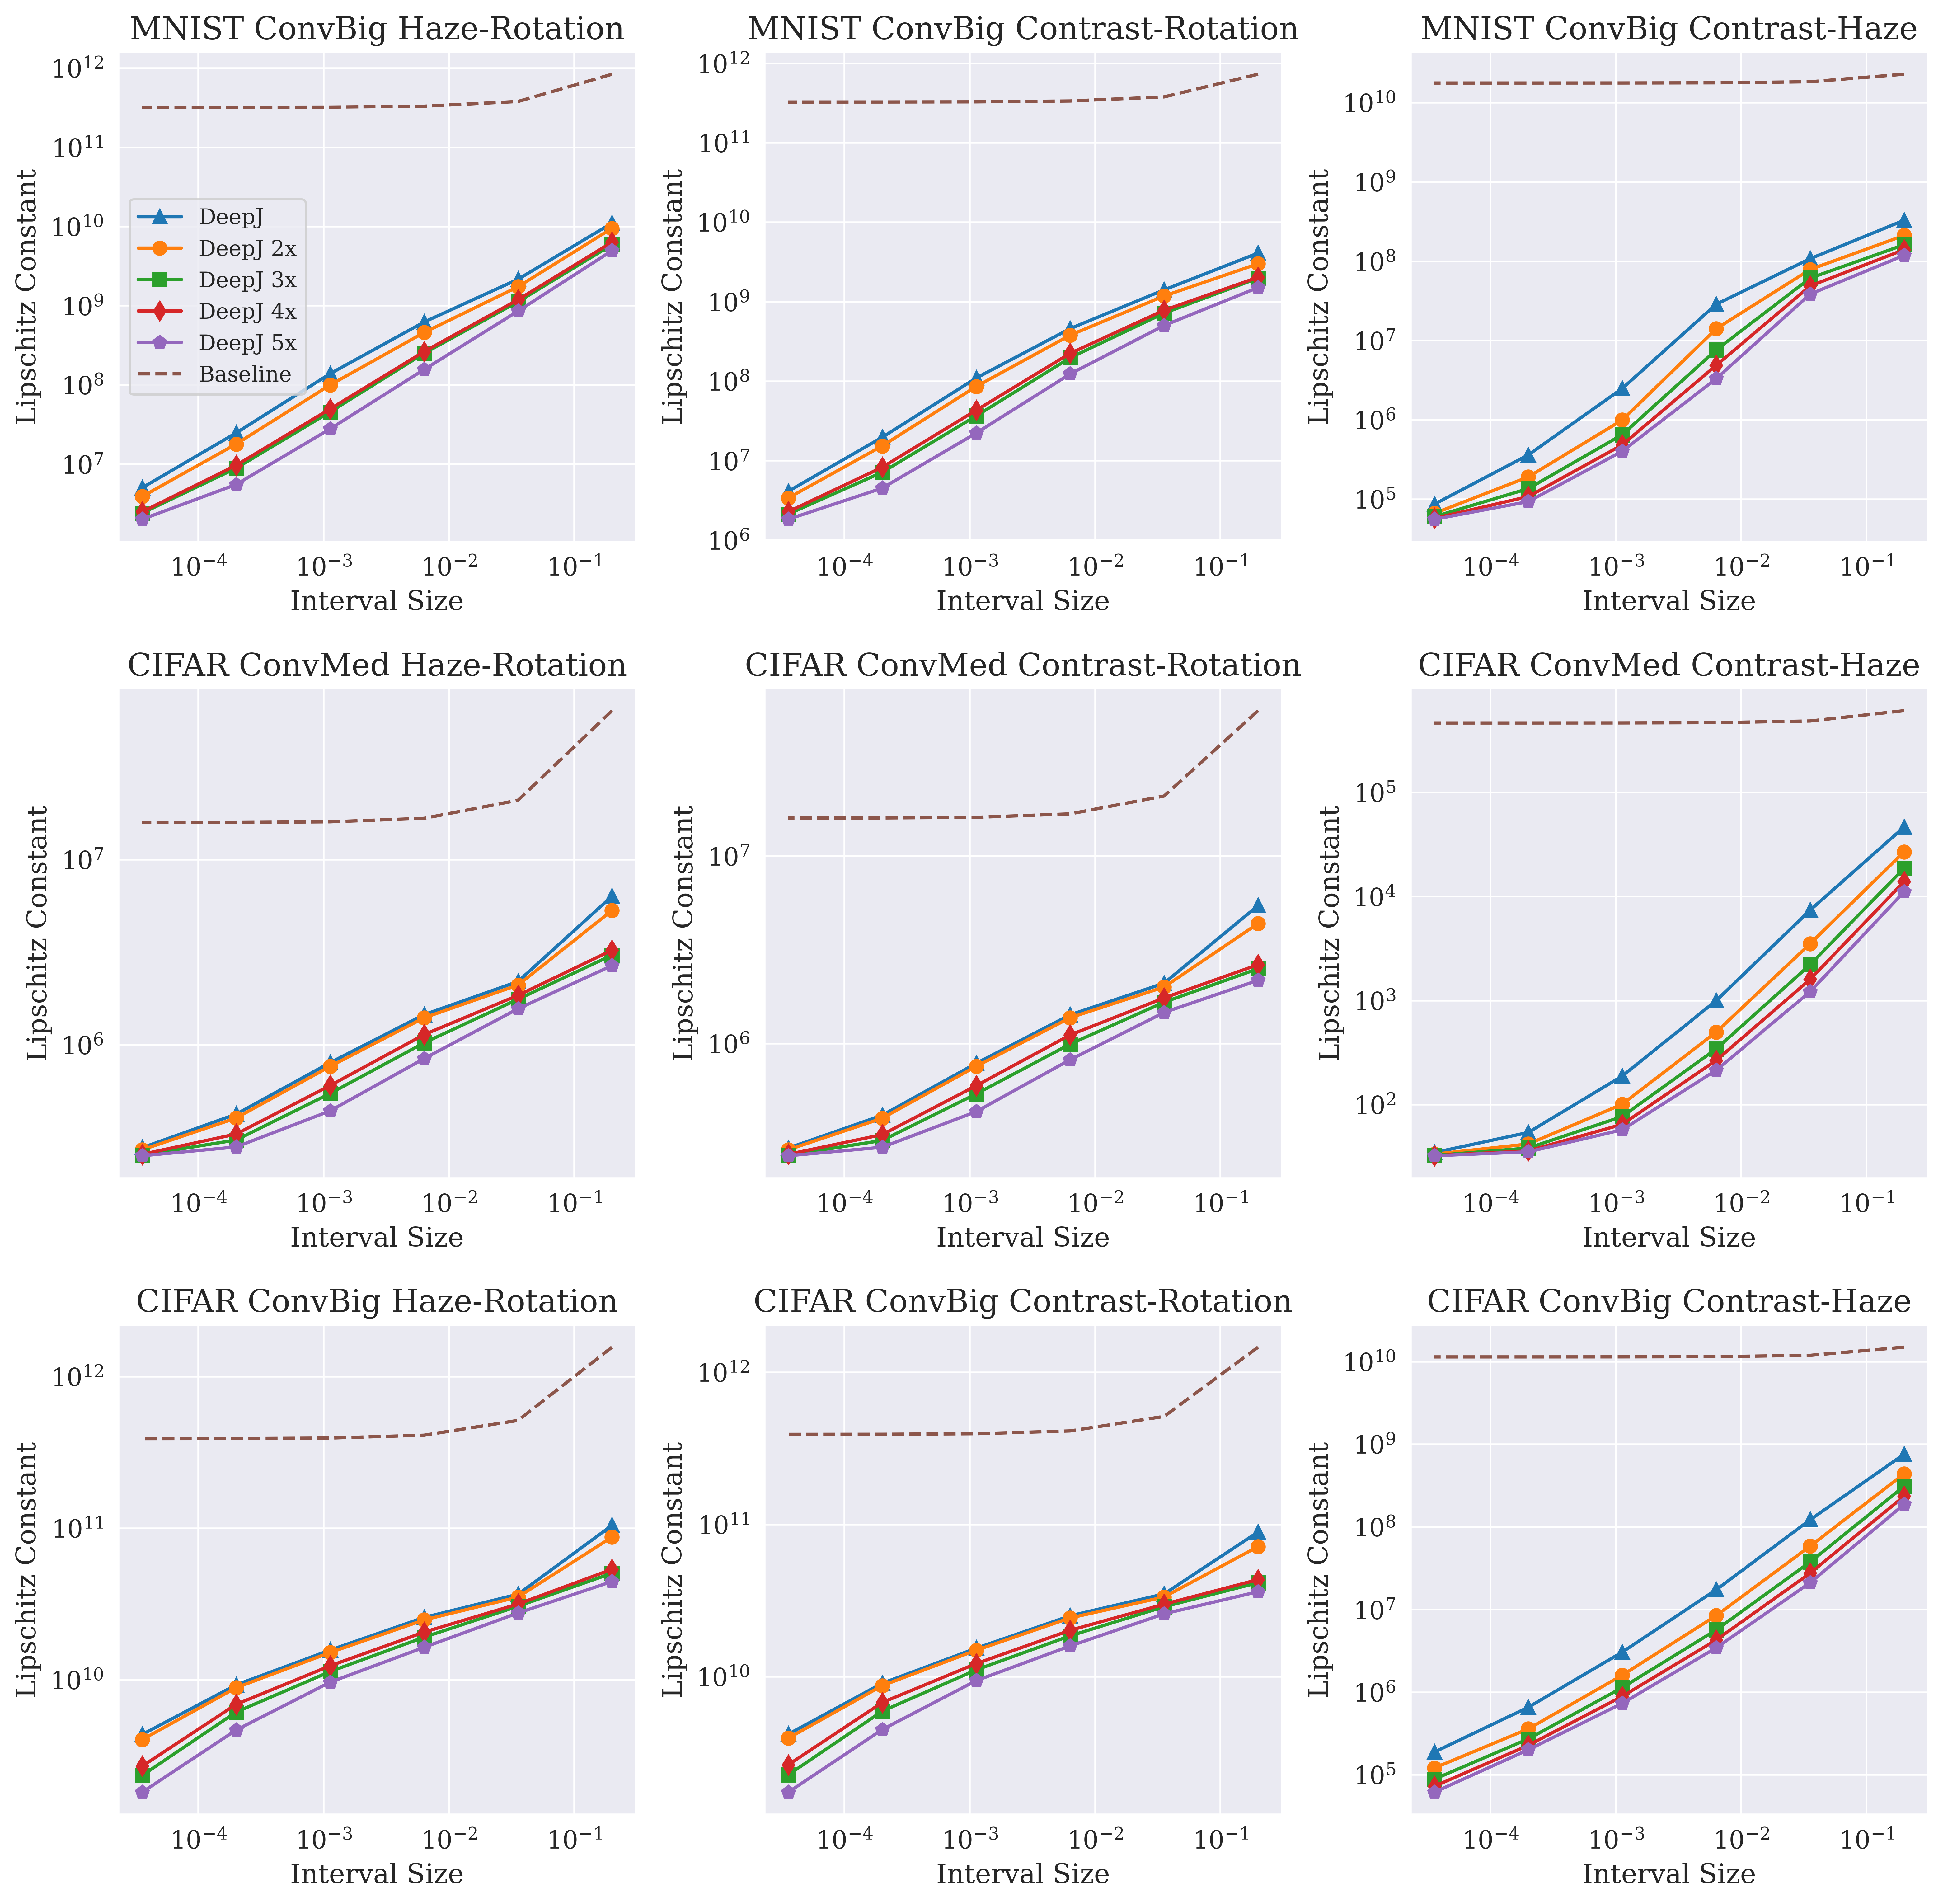

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

params = {'axes.labelsize': 12.5,
          'axes.titlesize': 14.5,
          'xtick.labelsize': 11.5,
          'ytick.labelsize': 11.5}
plt.rcParams.update(params)

sns.set_style("darkgrid", {'font.family':'serif', 'font.serif':'Times New Roman'})

plots_perturbations = {'HazeThenRotation':'Haze-Rotation', 'ContrastVariationThenRotation':'Contrast-Rotation', 'ContrastVariationThenHaze': 'Contrast-Haze'}

tool = 'DeepJ'
fig, axs = plt.subplots(3, 3, figsize=(15, 15), dpi=500)
plt.subplots_adjust(hspace=0.3, wspace=0.25)
    
for dataset, net, i in [('MNIST', 'ConvBig', 0), ('CIFAR', 'ConvMed', 1), ('CIFAR', 'ConvBig', 2)]:
    for j, perturbation in enumerate(perturbations):
        axs[i, j].set_title(f'{dataset} {net} {plots_perturbations[perturbation]}')
        axs[i, j].set_xlabel(u'Interval Size')
        axs[i, j].set_ylabel('Lipschitz Constant')
        axs[i, j].set_xscale('log')
        axs[i, j].set_yscale('log')

        interval_size, time, lc = zip(*all_data[dataset][net][perturbation])
        axs[i, j].plot(interval_size, lc, '-^', label=f'{tool}')

        interval_size, time, lc = zip(*all_data_splitting2[dataset][net][perturbation])
        axs[i, j].plot(interval_size, lc, '-o', label=f'{tool} 2x')

        interval_size, time, lc = zip(*all_data_splitting3[dataset][net][perturbation])
        axs[i, j].plot(interval_size, lc, '-s', label=f'{tool} 3x')
        
        interval_size, time, lc = zip(*all_data_splitting4[dataset][net][perturbation])
        axs[i, j].plot(interval_size, lc, '-d', label=f'{tool} 4x')
        
        interval_size, time, lc = zip(*all_data_splitting5[dataset][net][perturbation])
        axs[i, j].plot(interval_size, lc, '-p', label=f'{tool} 5x')
        
        # next(axs[i, j]._get_lines.prop_cycler)  # skip color to match with the single-perturbation graphs

        baseline = df[(df['dataset'] == dataset) & (df['perturbation'] == perturbation)]
        interval_size = baseline['interval_size']
        axs[i, j].plot(interval_size, np.array(baseline['norm']) * normalize_constants[dataset] * network_baselines[net][dataset][0], '--', label='Baseline')
        
        if dataset == 'MNIST' and net == 'ConvBig' and perturbation == 'HazeThenRotation':
            axs[i, j].legend()

plt.savefig('lipschitz_compose_MAIN.png', bbox_inches='tight')

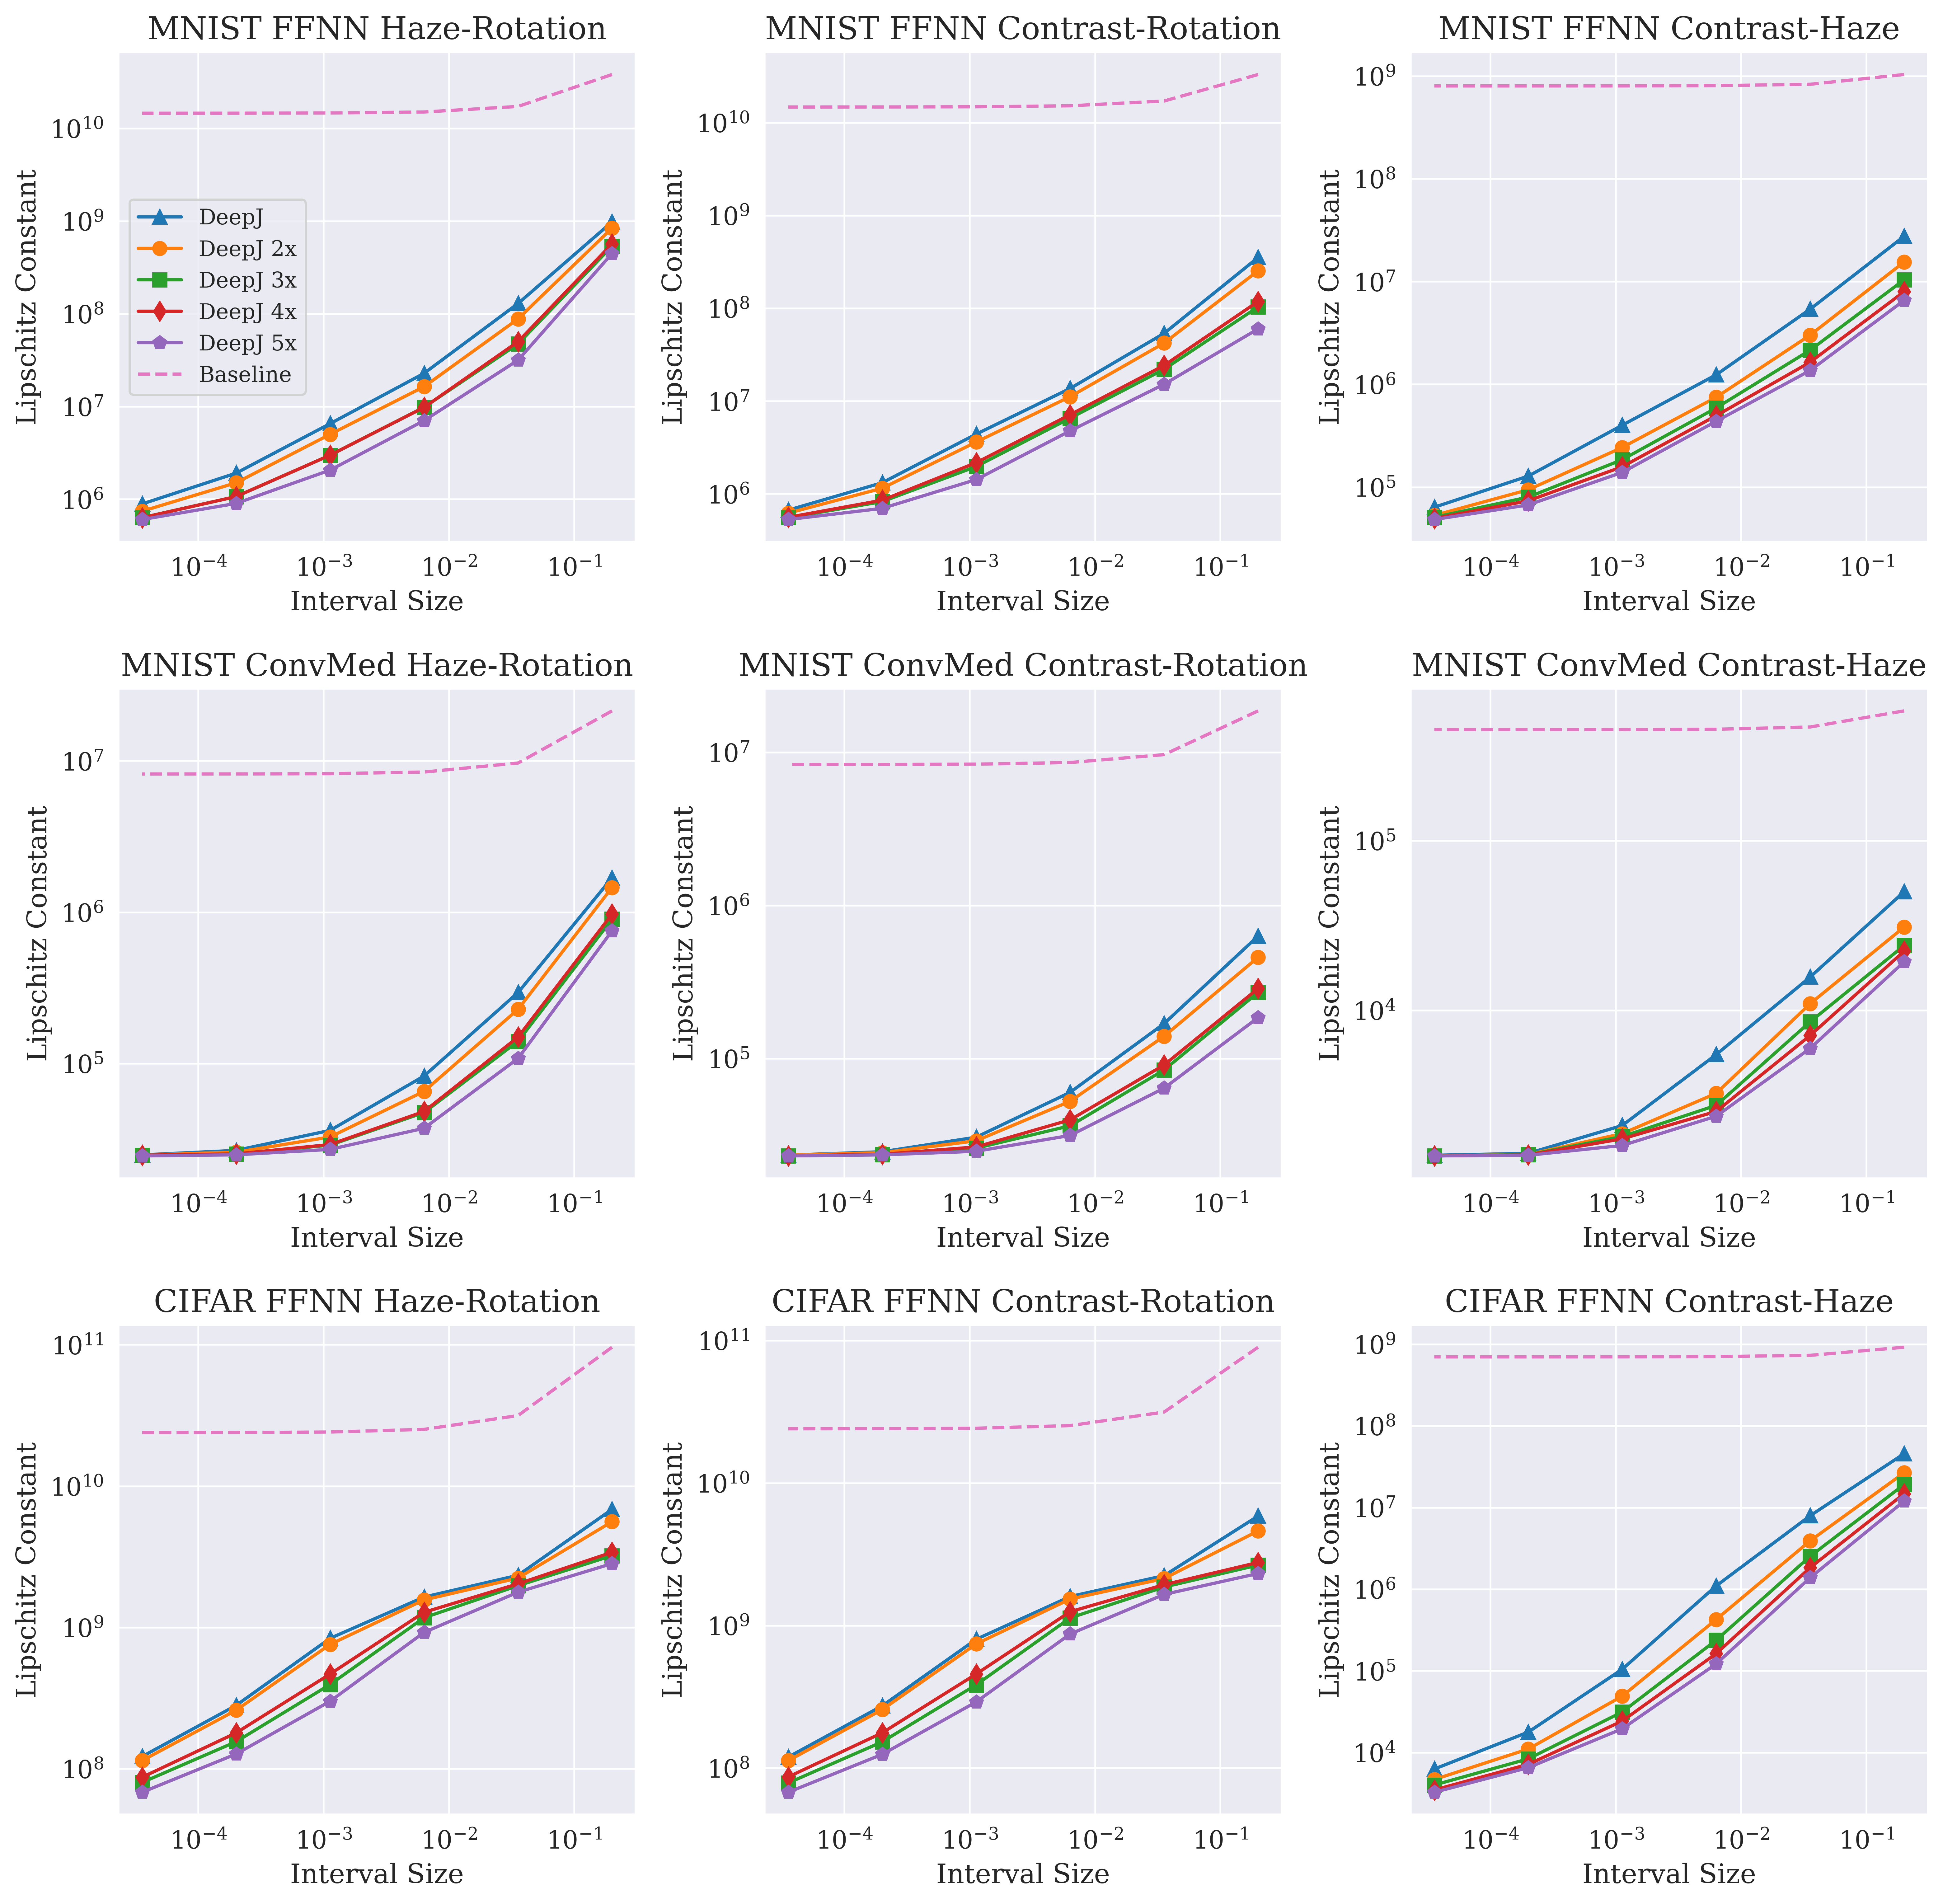

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

tool = 'DeepJ'
fig, axs = plt.subplots(3, 3, figsize=(15, 15), dpi=500)
plt.subplots_adjust(hspace=0.3, wspace=0.25)
    
dataset = 'MNIST'
net = 'FFNN'
i = 0

for j, perturbation in enumerate(perturbations):
    axs[i, j].set_title(f'{dataset} {net} {plots_perturbations[perturbation]}')
    axs[i, j].set_xlabel(u'Interval Size')
    axs[i, j].set_ylabel('Lipschitz Constant')
    axs[i, j].set_xscale('log')
    axs[i, j].set_yscale('log')

    interval_size, time, lc = zip(*all_data[dataset][net][perturbation])
    axs[i, j].plot(interval_size, lc, '-^', label=f'{tool}')

    interval_size, time, lc = zip(*all_data_splitting2[dataset][net][perturbation])
    axs[i, j].plot(interval_size, lc, '-o', label=f'{tool} 2x')

    interval_size, time, lc = zip(*all_data_splitting3[dataset][net][perturbation])
    axs[i, j].plot(interval_size, lc, '-s', label=f'{tool} 3x')
    
    interval_size, time, lc = zip(*all_data_splitting4[dataset][net][perturbation])
    axs[i, j].plot(interval_size, lc, '-d', label=f'{tool} 4x')
    
    interval_size, time, lc = zip(*all_data_splitting5[dataset][net][perturbation])
    axs[i, j].plot(interval_size, lc, '-p', label=f'{tool} 5x')
    
    next(axs[i, j]._get_lines.prop_cycler)  # skip color to match with the single-perturbation graphs

    baseline = df[(df['dataset'] == dataset) & (df['perturbation'] == perturbation)]
    interval_size = baseline['interval_size']
    axs[i, j].plot(interval_size, np.array(baseline['norm']) * normalize_constants[dataset] * network_baselines[net][dataset][0], '--', label='Baseline')
    
    if perturbation == 'HazeThenRotation':
        axs[i, j].legend()

dataset = 'MNIST'
net = 'ConvMed'
i = 1
for j, perturbation in enumerate(perturbations):
    axs[i, j].set_title(f'{dataset} {net} {plots_perturbations[perturbation]}')
    axs[i, j].set_xlabel(u'Interval Size')
    axs[i, j].set_ylabel('Lipschitz Constant')
    axs[i, j].set_xscale('log')
    axs[i, j].set_yscale('log')

    interval_size, time, lc = zip(*all_data[dataset][net][perturbation])
    axs[i, j].plot(interval_size, lc, '-^', label=f'{tool}')

    interval_size, time, lc = zip(*all_data_splitting2[dataset][net][perturbation])
    axs[i, j].plot(interval_size, lc, '-o', label=f'{tool} 2x')

    interval_size, time, lc = zip(*all_data_splitting3[dataset][net][perturbation])
    axs[i, j].plot(interval_size, lc, '-s', label=f'{tool} 3x')
    
    interval_size, time, lc = zip(*all_data_splitting4[dataset][net][perturbation])
    axs[i, j].plot(interval_size, lc, '-d', label=f'{tool} 4x')
    
    interval_size, time, lc = zip(*all_data_splitting5[dataset][net][perturbation])
    axs[i, j].plot(interval_size, lc, '-p', label=f'{tool} 5x')
    
    next(axs[i, j]._get_lines.prop_cycler)  # skip color to match with the single-perturbation graphs

    baseline = df[(df['dataset'] == dataset) & (df['perturbation'] == perturbation)]
    interval_size = baseline['interval_size']
    axs[i, j].plot(interval_size, np.array(baseline['norm']) * normalize_constants[dataset] * network_baselines[net][dataset][0], '--', label='Baseline')

dataset = 'CIFAR'
net = 'FFNN'
i = 2
for j, perturbation in enumerate(perturbations):
    axs[i, j].set_title(f'{dataset} {net} {plots_perturbations[perturbation]}')
    axs[i, j].set_xlabel(u'Interval Size')
    axs[i, j].set_ylabel('Lipschitz Constant')
    axs[i, j].set_xscale('log')
    axs[i, j].set_yscale('log')

    interval_size, time, lc = zip(*all_data[dataset][net][perturbation])
    axs[i, j].plot(interval_size, lc, '-^', label=f'{tool}')

    interval_size, time, lc = zip(*all_data_splitting2[dataset][net][perturbation])
    axs[i, j].plot(interval_size, lc, '-o', label=f'{tool} 2x')

    interval_size, time, lc = zip(*all_data_splitting3[dataset][net][perturbation])
    axs[i, j].plot(interval_size, lc, '-s', label=f'{tool} 3x')
    
    interval_size, time, lc = zip(*all_data_splitting4[dataset][net][perturbation])
    axs[i, j].plot(interval_size, lc, '-d', label=f'{tool} 4x')
    
    interval_size, time, lc = zip(*all_data_splitting5[dataset][net][perturbation])
    axs[i, j].plot(interval_size, lc, '-p', label=f'{tool} 5x')
    
    next(axs[i, j]._get_lines.prop_cycler)  # skip color to match with the single-perturbation graphs

    baseline = df[(df['dataset'] == dataset) & (df['perturbation'] == perturbation)]
    interval_size = baseline['interval_size']
    axs[i, j].plot(interval_size, np.array(baseline['norm']) * normalize_constants[dataset] * network_baselines[net][dataset][0], '--', label='Baseline')

plt.savefig('lipschitz_compose_APPENDIX.png', bbox_inches='tight')

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import median as med

sns.set_style("darkgrid")

# plt.style.use('ggplot')

tool = 'DeepJ'
dataset = 'CIFAR'

num_rows = 5
zeros = ('0\\\\' * num_rows)[:-2]
entries = (r'& \begin{tabular}[c]{@{}l@{}}' + zeros + r'\end{tabular} ') * 9

table = r"""
\begin{tabular}{c|ccc|ccc|ccc}
& \multicolumn{3}{c|}{Haze-Rotation} & \multicolumn{3}{c|}{Contrast-Rotation} & \multicolumn{3}{c}{Contrast-Haze} \\
& Min & Med & Max & Min & Med & Max & Min & Med & Max \\ 
\hline
""" + f"""
MNIST ConvBig {entries} \\\\
\hline
CIFAR ConvMed {entries} \\\\
\hline
CIFAR ConvBig {entries} \\\\
""" + r"""\end{tabular}"""

for dataset, net, i in [('MNIST','ConvBig', 0), ('CIFAR','ConvMed', 1), ('CIFAR','ConvBig', 2)]:
    for perturbation in perturbations:
        # DeepJ
        interval_size, time1, lc = zip(*all_data[dataset][net][perturbation])
        
        # DeepJ 2x
        interval_size, time2, lc = zip(*all_data_splitting2[dataset][net][perturbation])
        
        # DeepJ 3x
        interval_size, time3, lc = zip(*all_data_splitting3[dataset][net][perturbation])
        
        # DeepJ 5x
        interval_size, time5, lc = zip(*all_data_splitting5[dataset][net][perturbation])
        
        baseline = df[(df['dataset'] == dataset) & (df['perturbation'] == perturbation)]
        timebase = baseline['time']
        timebase += network_baselines[net][dataset][1]
        
        baseline_round = 1
        if perturbation == 'ContrastVariationThenHaze':
            baseline_round = 2
        
        table = table.replace(zeros, f'{round(min(time1)/1000, 1)}\\\\{round(min(time2)/1000, 1)}\\\\{round(min(time3)/1000, 1)}\\\\{round(min(time5)/1000, 1)}\\\\{round(min(timebase)/1000, baseline_round)}', 1)
        table = table.replace(zeros, f'{round(med(time1)/1000, 1)}\\\\{round(med(time2)/1000, 1)}\\\\{round(med(time3)/1000, 1)}\\\\{round(med(time5)/1000, 1)}\\\\{round(med(timebase)/1000, baseline_round)}', 1)
        table = table.replace(zeros, f'{round(max(time1)/1000, 1)}\\\\{round(max(time2)/1000, 1)}\\\\{round(max(time3)/1000, 1)}\\\\{round(max(time5)/1000, 1)}\\\\{round(max(timebase)/1000, baseline_round)}', 1)
        
print(table)


\begin{tabular}{c|ccc|ccc|ccc}
& \multicolumn{3}{c|}{Haze-Rotation} & \multicolumn{3}{c|}{Contrast-Rotation} & \multicolumn{3}{c}{Contrast-Haze} \\
& Min & Med & Max & Min & Med & Max & Min & Med & Max \\ 
\hline

MNIST ConvBig & \begin{tabular}[c]{@{}l@{}}14.8\\58.7\\76.0\\102.5\\8.2\end{tabular} & \begin{tabular}[c]{@{}l@{}}14.9\\59.6\\76.6\\103.4\\8.2\end{tabular} & \begin{tabular}[c]{@{}l@{}}24.4\\72.2\\78.0\\107.6\\13.9\end{tabular} & \begin{tabular}[c]{@{}l@{}}14.7\\58.8\\75.7\\102.3\\8.2\end{tabular} & \begin{tabular}[c]{@{}l@{}}14.9\\59.1\\76.3\\102.5\\8.2\end{tabular} & \begin{tabular}[c]{@{}l@{}}20.9\\70.9\\77.6\\105.7\\13.8\end{tabular} & \begin{tabular}[c]{@{}l@{}}6.3\\24.8\\33.8\\52.3\\0.06\end{tabular} & \begin{tabular}[c]{@{}l@{}}6.4\\25.2\\34.2\\52.8\\0.07\end{tabular} & \begin{tabular}[c]{@{}l@{}}6.7\\26.0\\35.0\\55.4\\0.08\end{tabular}  \\
\hline
CIFAR ConvMed & \begin{tabular}[c]{@{}l@{}}42.2\\167.2\\209.1\\247.4\\39.4\end{tabular} & \begin{tabular}[c]{@{}l@{}}42.2\